# Apziva Project-2

Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
#import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

Loading the data

In [2]:
df_main = pd.read_csv('term-deposit-marketing-2020.csv')
df_main

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [3]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [4]:
df_main.shape

(40000, 14)

In [5]:
df_main.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


##### Checking NULL values

In [6]:
df_main.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df_main[df_main.notnull()].count()

age          40000
job          40000
marital      40000
education    40000
default      40000
balance      40000
housing      40000
loan         40000
contact      40000
day          40000
month        40000
duration     40000
campaign     40000
y            40000
dtype: int64

In [8]:
df_main[df_main.isnull()].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [9]:
df_main.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

This shows that there are no NULL values in the data set. 

### Outliers Detection

Separating the dependent/target variable from data set before treating the independent variables. 

In [10]:
df_X = df_main.iloc[:, 0:13]
df_y = df_main.iloc[:, 13]

df_X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1


In [11]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 4.0+ MB


In [12]:
df_y

0         no
1         no
2         no
3         no
4         no
        ... 
39995     no
39996    yes
39997    yes
39998     no
39999     no
Name: y, Length: 40000, dtype: object

### Outliers removal for the numerical variables

To treat the outliers in the numerical variables, we'll use flooring for the lower values (e.g., the 10th percentile) and capping for the higher values (e.g., the 90th percentile) based on their skewness.

In [13]:
# Checking the skewness for each numerical variable

print('Skewness in AGE variable: %.3f' % df_X['age'].skew())
print('Skewness in BALANCE variable: %.3f' % df_X['balance'].skew())
print('Skewness in DAY variable: %.3f' % df_X['day'].skew())
print('Skewness in DURATION variable: %.3f' % df_X['duration'].skew())
print('Skewness in CAMPAIGN variable: %.3f' % df_X['campaign'].skew())

Skewness in AGE variable: 0.436
Skewness in BALANCE variable: 8.259
Skewness in DAY variable: 0.068
Skewness in DURATION variable: 3.165
Skewness in CAMPAIGN variable: 4.731


<font color=green>Now we'll plot the variables with high skewness i.e., >2 or <-2.

###### Balance variable

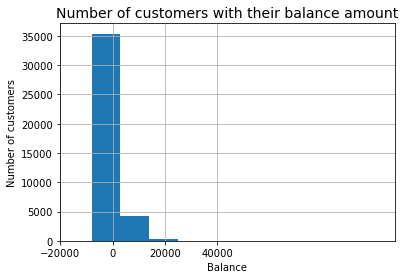

In [14]:
plt.hist(df_X['balance'])
plt.xticks([-20000, 0, 20000, 40000])
plt.title('Number of customers with their balance amount', fontsize=14)
plt.xlabel('Balance')
plt.ylabel('Number of customers')
plt.grid(True)
#plt.legend(['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])
plt.show()

To treat the outliers, we replace the values less than 10th percentile with the 10th percentile value and we replace the values greater than 90th percentile with the 90th percentile value. This should improve the skewness of the data.

In [15]:
df_X['balance'].quantile(0.10)   # Checking 10th percentile for the features having high skewness

0.0

In [16]:
df_X['balance'].quantile(0.90)   # Checking 90th percentile for the features having high skewness

3379.199999999997

In [17]:
import numpy as np
#df_X['balance'] = np.where(df_X['balance'] <0.0, 0.0, df_X['balance'])

In [18]:
df_X['balance'] = np.where(df_X['balance'] >30000, 30000, df_X['balance'])

In [19]:
df_X['balance'].quantile(0.90)   # Checking 90th percentile after treatment

3379.199999999997

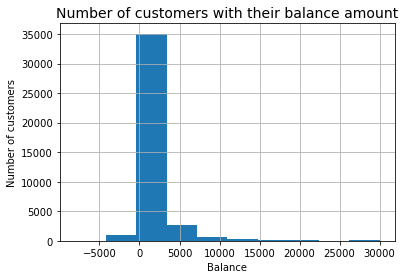

In [20]:
plt.hist(df_X['balance'])
#plt.xticks([-1000, -1000, 0, 1000, 2000, 3000, 4000])
plt.title('Number of customers with their balance amount', fontsize=14)
plt.xlabel('Balance')
plt.ylabel('Number of customers')
plt.grid(True)
#plt.legend(['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])
plt.show()

In [21]:
print('Skewness in BALANCE variable: %.3f' % df_X['balance'].skew())

Skewness in BALANCE variable: 5.031


So, the skewness of 'balance' variable is now reduced which means that outliers have been removed. 

###### Duration variable

In [22]:
# Changing the duration to minutes

df_X['duration'] = df_X['duration']/60
df_X['duration'] = np.ceil(df_X['duration'])
df_X['duration'] = df_X['duration'].astype(int)
df_X['duration'].value_counts()

2     8447
3     7628
4     5245
1     4517
5     3594
6     2476
7     1772
8     1261
9      953
10     744
11     646
12     489
13     388
14     304
15     249
16     222
17     162
18     152
19     128
20     117
21      87
23      59
22      58
24      50
25      47
26      36
27      26
29      19
31      16
28      15
32      14
33      13
30       9
34       8
35       5
41       4
52       4
38       4
37       4
42       3
47       3
0        3
55       2
39       2
45       2
44       2
36       2
51       1
82       1
54       1
40       1
56       1
58       1
65       1
57       1
48       1
Name: duration, dtype: int64

In [23]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int32 
 12  campaign   40000 non-null  int64 
dtypes: int32(1), int64(4), object(8)
memory usage: 3.8+ MB


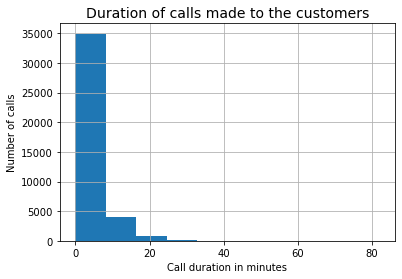

In [24]:
plt.hist(df_X['duration'])
#plt.xticks([0, 1, 2, 3, 4, 5])
plt.title('Duration of calls made to the customers', fontsize=14)
plt.xlabel('Call duration in minutes')
plt.ylabel('Number of calls')
plt.grid(True)
#plt.legend(['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])
plt.show()

In [25]:
df_X['duration'].quantile(0.10)   # Checking 10th percentile for the features having high skewness

1.0

In [26]:
df_X['duration'].quantile(0.90)   # Checking 10th percentile for the features having high skewness

10.0

In [27]:
#df_X['duration'] = np.where(df_X['duration'] <0.933, 0.933, df_X['duration'])

In [28]:
df_X['duration'] = np.where(df_X['duration'] >30, 30, df_X['duration'])

In [29]:
#df_X['duration'].quantile(0.10)   # Checking 10th percentile after treatment

In [30]:
df_X['duration'].quantile(0.90)   # Checking 90th percentile after treatment

10.0

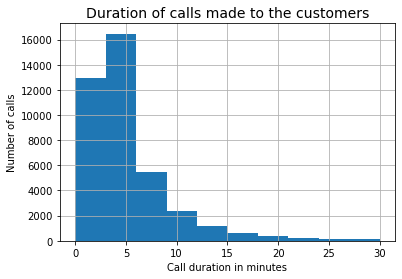

In [31]:
plt.hist(df_X['duration'])
#plt.xticks([0, 2, 4, 6, 8, 10])
plt.title('Duration of calls made to the customers', fontsize=14)
plt.xlabel('Call duration in minutes')
plt.ylabel('Number of calls')
plt.grid(True)
#plt.legend(['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])
plt.show()

###### Campaign variable

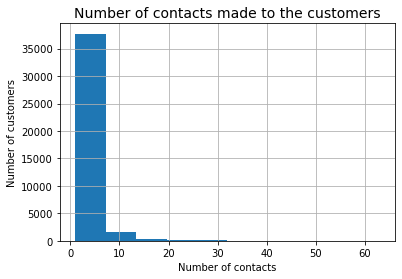

In [32]:
plt.hist(df_X['campaign'])
#plt.xticks([0, 10, 20, 30, 40, 50])
plt.title('Number of contacts made to the customers', fontsize=14)
plt.xlabel('Number of contacts')
plt.ylabel('Number of customers')
plt.grid(True)
#plt.legend(['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])
plt.show()

To treat the outliers, we replace the values less than 10th percentile with the 10th percentile value and we replace the values greater than 90th percentile with the 90th percentile value. This should improve the skewness of the data.

In [33]:
df_X['campaign'].quantile(0.10)   # Checking 10th percentile for the features having high skewness

1.0

In [34]:
df_X['campaign'].quantile(0.90)   # Checking 90th percentile for the features having high skewness

6.0

In [35]:
import numpy as np
#df_X['campaign'] = np.where(df_X['campaign'] <0.0, 0.0, df_X['campaign'])

In [36]:
df_X['campaign'] = np.where(df_X['campaign'] >20, 20, df_X['campaign'])

In [37]:
df_X['campaign'].quantile(0.90)   # Checking 90th percentile after treatment

6.0

In [38]:
print('Skewness in CAMPAIGN variable: %.3f' % df_X['campaign'].skew())

Skewness in CAMPAIGN variable: 3.224


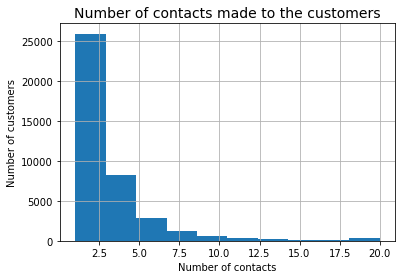

In [39]:
plt.hist(df_X['campaign'])
#plt.xticks([0, 2, 4, 6, 8])
plt.title('Number of contacts made to the customers', fontsize=14)
plt.xlabel('Number of contacts')
plt.ylabel('Number of customers')
plt.grid(True)
#plt.legend(['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])
plt.show()

### Treatment of independent continuous numerical variables

First, we shall do __Bucketing/Binning__ for the continous numerical variables

AGE variable

In [40]:
print(df_X['age'].unique())
df_X['age'].value_counts()

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81]


32    1909
31    1826
33    1770
34    1730
35    1721
      ... 
90       1
94       1
86       1
95       1
81       1
Name: age, Length: 70, dtype: int64

In [41]:
df_X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,5,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,3,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,2,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,2,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,2,1
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,4,3
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,3,1
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,6,1


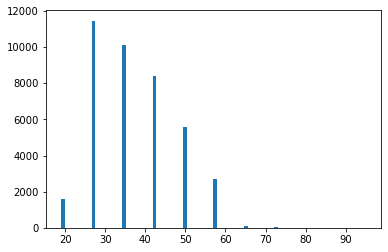

In [42]:
plt.hist(df_X['age'], width=0.9)
plt.show()

Bucketing/Binning the AGE variable

In [43]:
age_bins = [18, 30, 45, 60, 100]
labels =['1: 18-25','2: 26-40','3: 41-55','4: 56-100']

#df_X['age'] = pd.cut(df_X['age'], age_bins)
df_X['age'] = pd.cut(df_X['age'], age_bins, labels=labels)

In [44]:
df_X['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 40000 entries, 0 to 39999
Series name: age
Non-Null Count  Dtype   
--------------  -----   
40000 non-null  category
dtypes: category(1)
memory usage: 39.4 KB


In [45]:
#df_X['age'] = df_X.age.astype(str)
#df_X['age'].info()

In [46]:
df_X['age'].value_counts()

2: 26-40     21812
3: 41-55     12115
1: 18-25      5839
4: 56-100      234
Name: age, dtype: int64

<AxesSubplot:>

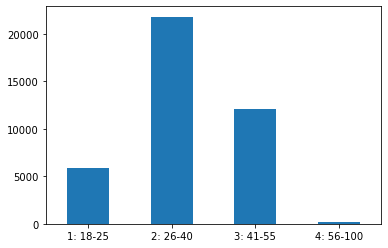

In [47]:
#plt.hist(df_X['age'])
#plt.show()

df_X['age'].value_counts(sort=False).plot.bar(rot=0)

BALANCE variable

In [48]:
print(df_X['balance'].unique())
df_X['balance'].value_counts()

[2143   29    2 ... 4545 7222 3402]


0        3209
1         179
2         141
4         126
3         124
         ... 
22557       1
3282        1
2661        1
9664        1
3402        1
Name: balance, Length: 6810, dtype: int64

Bucketing/Binning the BALANCE variable

In [49]:
df_X['balance'].value_counts()

0        3209
1         179
2         141
4         126
3         124
         ... 
22557       1
3282        1
2661        1
9664        1
3402        1
Name: balance, Length: 6810, dtype: int64

In [50]:
balance_bins = [-10000, 0, 2000, 5000, 10000, 35000]
labels =['1: -10000 - -1','2: 0-2000','3: 2001-5000','4: 5001-10000', '5: 10001-30000']
df_X['balance'] = pd.cut(df_X['balance'], balance_bins, labels=labels)
df_X['balance'] = df_X.balance.astype(str)
df_X['balance'].value_counts()

2: 0-2000         26065
1: -10000 - -1     6940
3: 2001-5000       4650
4: 5001-10000      1674
5: 10001-30000      671
Name: balance, dtype: int64

In [51]:
#df_X['balance'][df_X['balance'].values == 'nan']

In [52]:
#df_X.iloc[34]

<AxesSubplot:>

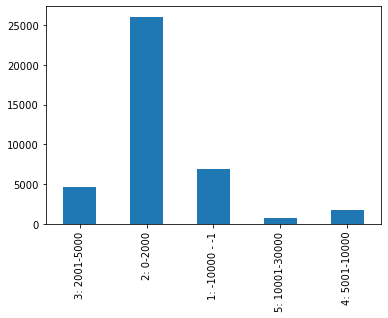

In [53]:
df_X['balance'].value_counts(sort=False).plot.bar(rot=90)

DURATION variable

In [54]:
print(df_X['duration'].unique())
df_X['duration'].value_counts()

[ 5  3  2  4  7  1  9  6 28 10 25 11 14 30 18 24  8 15 12 13 17 21 16 22
 27 26 19 29 20 23  0]


2     8447
3     7628
4     5245
1     4517
5     3594
6     2476
7     1772
8     1261
9      953
10     744
11     646
12     489
13     388
14     304
15     249
16     222
17     162
18     152
19     128
20     117
30     106
21      87
23      59
22      58
24      50
25      47
26      36
27      26
29      19
28      15
0        3
Name: duration, dtype: int64

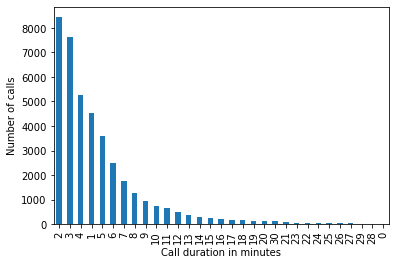

In [55]:
df_X['duration'].value_counts().plot.bar(rot=0)
plt.xticks(rotation=90)
plt.xlabel('Call duration in minutes')
plt.ylabel('Number of calls')
plt.show()

Bucketing/Binning of the DURATION variable is not needed

In [56]:
#duration_bins = [0, 1, 5, 10, 60, 600]
#labels =[1: 0-1,2: 1-5,3: 5-10,4: 10-60,5: 60-600]
#df_X['duration'] = pd.cut(df_X['duration'], duration_bins, labels=labels)
#df_X['duration'] = df_X.duration.astype(str)
#df_X

In [57]:
#df_X['duration'].value_counts().plot.bar(rot=0)

DAY variable

In [58]:
print(df_X['day'].unique())
df_X['day'].value_counts()

[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]


20    2655
18    2173
21    1914
17    1812
6     1778
5     1691
28    1650
19    1650
14    1636
8     1620
7     1612
29    1600
15    1468
30    1457
9     1374
13    1325
12    1289
11    1272
16    1215
4     1183
2     1109
27     974
26     895
3      874
23     823
22     773
25     695
31     591
10     364
24     352
1      176
Name: day, dtype: int64

No treatment is required for the 'day' variable

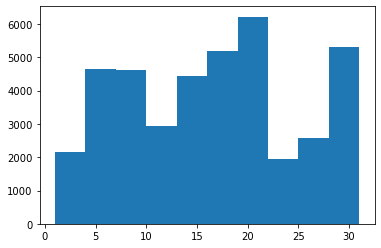

In [59]:
plt.hist(df_X['day'])
plt.show()

CAMPAIGN variable

In [60]:
print(df_X['campaign'].unique())
df_X['campaign'].value_counts()

[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 20 16 18 15 17]


1     14718
2     11153
3      4970
4      3297
5      1642
6      1228
7       699
8       526
9       318
20      287
10      262
11      197
12      154
13      131
14       93
15       83
16       78
17       69
18       51
19       44
Name: campaign, dtype: int64

Bucketing/Binning the CAMPAIGN variable

In [61]:
campaign_bins = [0, 1, 2, 3, 5, 10, 65]
labels =['1: 0-1','2: 1-2','3: 2-3','4:3-5','5: 5-10','6: 10-65']
df_X['campaign'] = pd.cut(df_X['campaign'], campaign_bins, labels=labels)
df_X['campaign'] = df_X.campaign.astype(str)
df_X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,3: 41-55,management,married,tertiary,no,3: 2001-5000,yes,no,unknown,5,may,5,1: 0-1
1,2: 26-40,technician,single,secondary,no,2: 0-2000,yes,no,unknown,5,may,3,1: 0-1
2,2: 26-40,entrepreneur,married,secondary,no,2: 0-2000,yes,yes,unknown,5,may,2,1: 0-1
3,3: 41-55,blue-collar,married,unknown,no,2: 0-2000,yes,no,unknown,5,may,2,1: 0-1
4,2: 26-40,unknown,single,unknown,no,2: 0-2000,no,no,unknown,5,may,4,1: 0-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,3: 41-55,technician,married,tertiary,no,2: 0-2000,no,no,cellular,3,jun,2,1: 0-1
39996,1: 18-25,management,single,tertiary,no,3: 2001-5000,no,no,cellular,3,jun,4,3: 2-3
39997,3: 41-55,admin,divorced,secondary,no,2: 0-2000,no,no,cellular,3,jun,3,1: 0-1
39998,2: 26-40,management,married,tertiary,no,2: 0-2000,no,no,cellular,3,jun,6,1: 0-1


<AxesSubplot:>

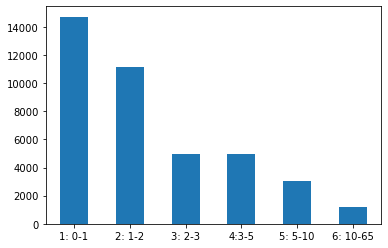

In [62]:
df_X['campaign'].value_counts(sort=False).plot.bar(rot=0)

In [63]:
df_X.dtypes

age          category
job            object
marital        object
education      object
default        object
balance        object
housing        object
loan           object
contact        object
day             int64
month          object
duration        int32
campaign       object
dtype: object

### Treatment of independent categorical variables

JOB variable

In [64]:
print(df_X['job'].unique())
df_X['job'].value_counts()

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64

We can group some of the job categories together

In [65]:
merge_job = {"job":{"technician": 'blue-collar',
                    "housemaid": 'blue-collar', 
                    "management": 'white-collar', 
                    "admin": 'white-collar', 
                    "student": 'unemployed',
                    "retired": 'unemployed',
                    "entrepreneur": 'self-employed'}
                    }
df_X.replace(merge_job, inplace=True)

In [66]:
print(df_X['job'].unique())
df_X['job'].value_counts()

['white-collar' 'blue-collar' 'self-employed' 'unknown' 'unemployed'
 'services']


blue-collar      17322
white-collar     12649
services          3910
unemployed        3065
self-employed     2819
unknown            235
Name: job, dtype: int64

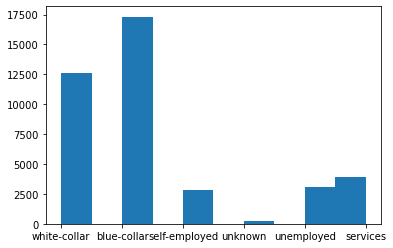

In [67]:
plt.hist(df_X['job'])
plt.show()

MARITAL STATUS variable

In [68]:
print(df_X['marital'].unique())
df_X['marital'].value_counts()

['married' 'single' 'divorced']


married     24386
single      10889
divorced     4725
Name: marital, dtype: int64

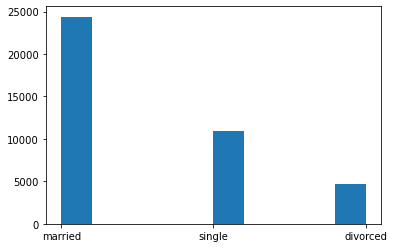

In [69]:
plt.hist(df_X['marital'])
plt.show()

EDUCATION variable

In [70]:
print(df_X['education'].unique())
df_X['education'].value_counts()

['tertiary' 'secondary' 'unknown' 'primary']


secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64

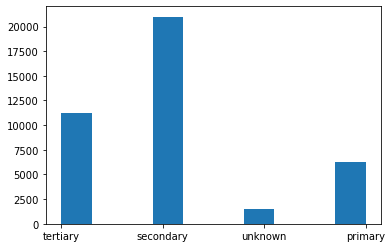

In [71]:
plt.hist(df_X['education'])
plt.show()

DEFAULT variable

In [72]:
print(df_X['default'].unique())
df_X['default'].value_counts()

['no' 'yes']


no     39191
yes      809
Name: default, dtype: int64

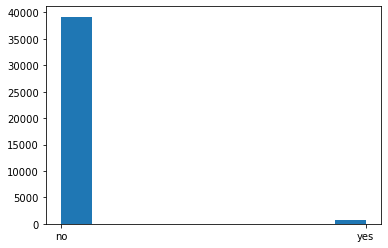

In [73]:
plt.hist(df_X['default'])
plt.show()

HOUSING variable

In [74]:
print(df_X['housing'].unique())
df_X['housing'].value_counts()

['yes' 'no']


yes    24031
no     15969
Name: housing, dtype: int64

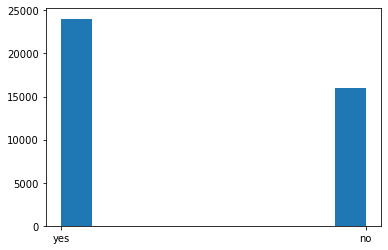

In [75]:
plt.hist(df_X['housing'])
plt.show()

LOAN

In [76]:
print(df_X['loan'].unique())
df_X['loan'].value_counts()

['no' 'yes']


no     33070
yes     6930
Name: loan, dtype: int64

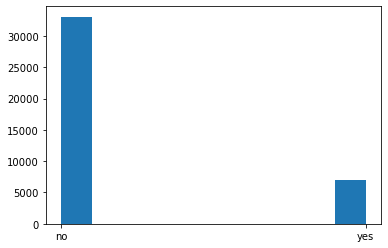

In [77]:
plt.hist(df_X['loan'])
plt.show()

CONTACT METHOD

In [78]:
print(df_X['contact'].unique())
df_X['contact'].value_counts()

['unknown' 'cellular' 'telephone']


cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64

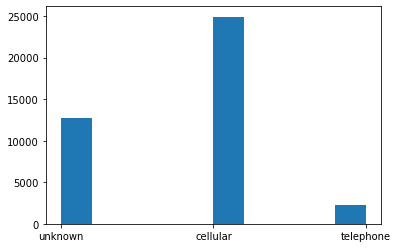

In [79]:
plt.hist(df_X['contact'])
plt.show()

MONTH

In [80]:
#print(df_X['month'].unique())
#df_X['month'].value_counts()

In [81]:
#merge_month = {"month":{"jan": 'Q1',
#                        "feb": 'Q1', 
#                        "mar": 'Q1', 
#                        "apr": 'Q2', 
#                        "may": 'Q2',
#                        "jun": 'Q2',
#                        "jul": 'Q3',
#                        "aug": 'Q3',
#                        "sep": 'Q3',
#                        "oct": 'Q4',
#                        "nov": 'Q4',
#                        "dec": 'Q4',
#                       }  
#                }
#df_X.replace(merge_month, inplace=True)

In [82]:
print(df_X['month'].unique())
df_X['month'].value_counts()

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']


may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: month, dtype: int64

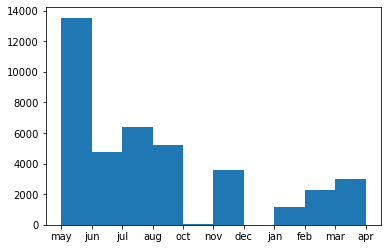

In [83]:
plt.hist(df_X['month'])
plt.show()

Dependent variable '__y__'

In [84]:
print('Unique values of ''y'':', df_y.unique())
print('\nNumber of occurences of each unique value of ''y'':\n', df_y.value_counts())

Unique values of y: ['no' 'yes']

Number of occurences of each unique value of y:
 no     37104
yes     2896
Name: y, dtype: int64


In [85]:
# Changing y values from yes/no to 1/0

df_y = df_y.map(dict(yes=1, no=0))
df_y

0        0
1        0
2        0
3        0
4        0
        ..
39995    0
39996    1
39997    1
39998    0
39999    0
Name: y, Length: 40000, dtype: int64

In [86]:
print('Unique values of ''y'':', df_y.unique())
print('\nNumber of occurences of each unique value of ''y'':\n', df_y.value_counts())

Unique values of y: [0 1]

Number of occurences of each unique value of y:
 0    37104
1     2896
Name: y, dtype: int64


In [87]:
df_y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 40000 entries, 0 to 39999
Series name: y
Non-Null Count  Dtype
--------------  -----
40000 non-null  int64
dtypes: int64(1)
memory usage: 312.6 KB


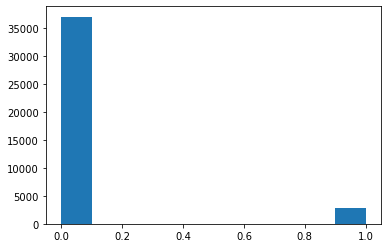

In [88]:
plt.hist(df_y)
plt.show()

### Using One-Hot Encoding for the categorical variables

In [89]:
list(df_X.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign']

In [90]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40000 non-null  category
 1   job        40000 non-null  object  
 2   marital    40000 non-null  object  
 3   education  40000 non-null  object  
 4   default    40000 non-null  object  
 5   balance    40000 non-null  object  
 6   housing    40000 non-null  object  
 7   loan       40000 non-null  object  
 8   contact    40000 non-null  object  
 9   day        40000 non-null  int64   
 10  month      40000 non-null  object  
 11  duration   40000 non-null  int32   
 12  campaign   40000 non-null  object  
dtypes: category(1), int32(1), int64(1), object(10)
memory usage: 3.5+ MB


##### _Using Pandas library_

In [91]:
df_X_OHE = pd.get_dummies(df_X, columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'month', 'campaign']) 

pd.set_option('display.max_columns', None) #in order to display all the var/columns
df_X_OHE

,day,duration,age_1: 18-25,age_2: 26-40,age_3: 41-55,age_4: 56-100,job_blue-collar,job_self-employed,job_services,job_unemployed,job_unknown,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,balance_1: -10000 - -1,balance_2: 0-2000,balance_3: 2001-5000,balance_4: 5001-10000,balance_5: 10001-30000,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,campaign_1: 0-1,campaign_2: 1-2,campaign_3: 2-3,campaign_4:3-5,campaign_5: 5-10,campaign_6: 10-65
0,5,5,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,5,3,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,5,2,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,5,2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,5,4,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,3,2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
39996,3,4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
39997,3,3,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
39998,3,6,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [92]:
df_X_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   day                     40000 non-null  int64
 1   duration                40000 non-null  int32
 2   age_1: 18-25            40000 non-null  uint8
 3   age_2: 26-40            40000 non-null  uint8
 4   age_3: 41-55            40000 non-null  uint8
 5   age_4: 56-100           40000 non-null  uint8
 6   job_blue-collar         40000 non-null  uint8
 7   job_self-employed       40000 non-null  uint8
 8   job_services            40000 non-null  uint8
 9   job_unemployed          40000 non-null  uint8
 10  job_unknown             40000 non-null  uint8
 11  job_white-collar        40000 non-null  uint8
 12  marital_divorced        40000 non-null  uint8
 13  marital_married         40000 non-null  uint8
 14  marital_single          40000 non-null  uint8
 15  education_primary  

#### Correlation Matrix

In [93]:
#correlation = df_X_OHE.corr()   # correlation matrix is used for numerical variables only
correlation = df_X.corr()
print(correlation)

               day  duration
day       1.000000 -0.033327
duration -0.033327  1.000000


<AxesSubplot:>

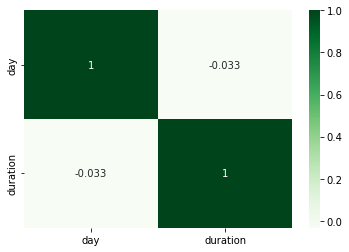

In [94]:
#plt.figure(figsize=(16, 24))
sns.heatmap(correlation, cmap = "Greens", annot = True)

The correlation matrix shows that there is very little correlation between the two numerical variables.

### Plotting Y against the independent variables

In [95]:
# Merging 'X' and 'y' variables for plotting the graphs showing their relationship

df_merged = pd.concat([df_X, df_y], axis=1)
df_merged

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,3: 41-55,white-collar,married,tertiary,no,3: 2001-5000,yes,no,unknown,5,may,5,1: 0-1,0
1,2: 26-40,blue-collar,single,secondary,no,2: 0-2000,yes,no,unknown,5,may,3,1: 0-1,0
2,2: 26-40,self-employed,married,secondary,no,2: 0-2000,yes,yes,unknown,5,may,2,1: 0-1,0
3,3: 41-55,blue-collar,married,unknown,no,2: 0-2000,yes,no,unknown,5,may,2,1: 0-1,0
4,2: 26-40,unknown,single,unknown,no,2: 0-2000,no,no,unknown,5,may,4,1: 0-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,3: 41-55,blue-collar,married,tertiary,no,2: 0-2000,no,no,cellular,3,jun,2,1: 0-1,0
39996,1: 18-25,white-collar,single,tertiary,no,3: 2001-5000,no,no,cellular,3,jun,4,3: 2-3,1
39997,3: 41-55,white-collar,divorced,secondary,no,2: 0-2000,no,no,cellular,3,jun,3,1: 0-1,1
39998,2: 26-40,white-collar,married,tertiary,no,2: 0-2000,no,no,cellular,3,jun,6,1: 0-1,0


In [96]:
#----- break -----

<br><font color=blue>AGE vs Y

In [97]:
y_age = df_merged.groupby(['age'])['y'].mean().reset_index()
y_age.rename(columns = {'y':'y_average'}, inplace = True)
y_age

,age,y_average
0,1: 18-25,0.102586
1,2: 26-40,0.067257
2,3: 41-55,0.060999
3,4: 56-100,0.388889


In [98]:
df_age = df_merged.groupby(['age'])['y'].count().reset_index()
df_age.rename(columns = {'y':'y_count'}, inplace = True)
df_age

,age,y_count
0,1: 18-25,5839
1,2: 26-40,21812
2,3: 41-55,12115
3,4: 56-100,234


In [99]:
df_age = df_age.drop(['age'], axis=1)
df_age

,y_count
0,5839
1,21812
2,12115
3,234


In [100]:
y_age = pd.concat([y_age, df_age], axis=1)
y_age

,age,y_average,y_count
0,1: 18-25,0.102586,5839
1,2: 26-40,0.067257,21812
2,3: 41-55,0.060999,12115
3,4: 56-100,0.388889,234


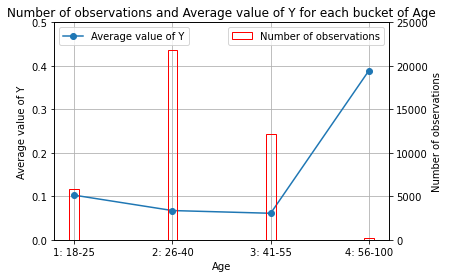

In [101]:
fig, ax = plt.subplots()

ax.plot(y_age['age'], y_age['y_average'], marker='o', label = 'Average value of Y')
ax.set_xlabel('Age')
ax.set_ylabel('Average value of Y')
#plt.xticks(rotation=90)
#ax.set_xlim([1, 4])
ax.set_ylim([0.0, 0.5])
ax.legend(loc="upper left")

ax2 = ax.twinx() 
ax2.bar(y_age['age'], y_age['y_count'], color = 'none', edgecolor = 'red', label = 'Number of observations', width=0.1)
ax2.set_ylabel('Number of observations') 
ax2.set_ylim([0, 25000])
ax2.legend(loc="upper right")

ax.set_title('Number of observations and Average value of Y for each bucket of Age')
ax.grid(True)

In [102]:
#----- break -----

<br><font color=blue>JOB vs Y

In [103]:
y_job = df_merged.groupby(['job'])['y'].mean().reset_index()
y_job.rename(columns = {'y':'y_average'}, inplace = True)
y_job

,job,y_average
0,blue-collar,0.062637
1,self-employed,0.070947
2,services,0.060870
3,unemployed,0.107341
4,unknown,0.072340
5,white-collar,0.081192


In [104]:
df_job = df_merged.groupby(['job'])['y'].count().reset_index()
df_job.rename(columns = {'y':'y_count'}, inplace = True)
df_job

,job,y_count
0,blue-collar,17322
1,self-employed,2819
2,services,3910
3,unemployed,3065
4,unknown,235
5,white-collar,12649


In [105]:
df_job = df_job.drop(['job'], axis=1)
df_job

,y_count
0,17322
1,2819
2,3910
3,3065
4,235
5,12649


In [106]:
y_job = pd.concat([y_job, df_job], axis=1)
y_job

,job,y_average,y_count
0,blue-collar,0.062637,17322
1,self-employed,0.070947,2819
2,services,0.060870,3910
3,unemployed,0.107341,3065
4,unknown,0.072340,235
5,white-collar,0.081192,12649


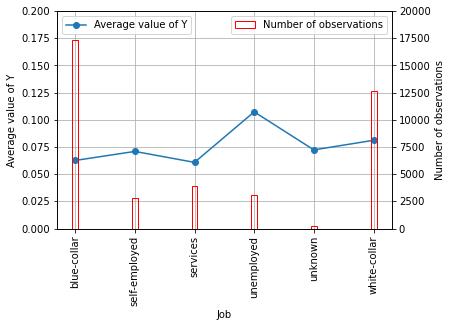

In [107]:
fig, ax = plt.subplots()

ax.plot(y_job['job'], y_job['y_average'], marker='o', label = 'Average value of Y')
ax.set_xlabel('Job')
ax.set_ylabel('Average value of Y')
plt.xticks(rotation=90)
#ax.set_xlim([1, 4])
ax.set_ylim([0.0, 0.2])
ax.legend(loc="upper left")

ax2 = ax.twinx() 
ax2.bar(y_job['job'], y_job['y_count'], color = 'none', edgecolor = 'red', label = 'Number of observations', width=0.1)
ax2.set_ylabel('Number of observations') 
ax2.set_ylim([0, 20000])
ax2.legend(loc="upper right")

#ax.set_title('Number of observations and Average value of Y for each type of Job')
ax.grid(True)
#plt.show()

<br><font color=blue>MARITAL status vs Y

In [108]:
y_marital = df_merged.groupby(['marital'])['y'].mean().reset_index()
y_marital.rename(columns = {'y':'y_average'}, inplace = True)
y_marital

,marital,y_average
0,divorced,0.082751
1,married,0.060609
2,single,0.094315


In [109]:
df_marital = df_merged.groupby(['marital'])['y'].count().reset_index()
df_marital.rename(columns = {'y':'y_count'}, inplace = True)
df_marital

,marital,y_count
0,divorced,4725
1,married,24386
2,single,10889


In [110]:
df_marital = df_marital.drop(['marital'], axis=1)
df_marital

,y_count
0,4725
1,24386
2,10889


In [111]:
y_marital = pd.concat([y_marital, df_marital], axis=1)
y_marital

,marital,y_average,y_count
0,divorced,0.082751,4725
1,married,0.060609,24386
2,single,0.094315,10889


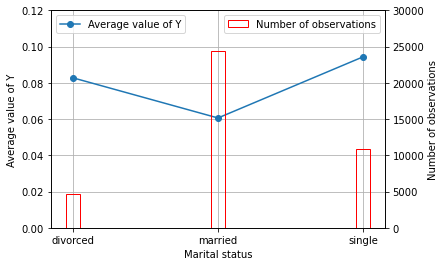

In [112]:
fig, ax = plt.subplots()

ax.plot(y_marital['marital'], y_marital['y_average'], marker='o', label = 'Average value of Y')
ax.set_xlabel('Marital status')
ax.set_ylabel('Average value of Y')
#plt.xticks(rotation=90)
#ax.set_xlim([1, 4])
ax.set_ylim([0.0, 0.12])
ax.legend(loc="upper left")

ax2 = ax.twinx() 
ax2.bar(y_marital['marital'], y_marital['y_count'], color = 'none', edgecolor = 'red', label = 'Number of observations', width=0.1)
ax2.set_ylabel('Number of observations') 
ax2.set_ylim([0, 30000])
ax2.legend(loc="upper right")

#ax.set_title('Number of observations and Average value of Y for each type of marital')
ax.grid(True)
#plt.show()

<br><font color=blue>EDUCATION vs Y

In [113]:
y_education = df_merged.groupby(['education'])['y'].mean().reset_index()
y_education.rename(columns = {'y':'y_average'}, inplace = True)
y_education

,education,y_average
0,primary,0.056300
1,secondary,0.067546
2,tertiary,0.091826
3,unknown,0.062704


In [114]:
df_education = df_merged.groupby(['education'])['y'].count().reset_index()
df_education.rename(columns = {'y':'y_count'}, inplace = True)
df_education

,education,y_count
0,primary,6270
1,secondary,20993
2,tertiary,11206
3,unknown,1531


In [115]:
df_education = df_education.drop(['education'], axis=1)
df_education

,y_count
0,6270
1,20993
2,11206
3,1531


In [116]:
y_education = pd.concat([y_education, df_education], axis=1)
y_education

,education,y_average,y_count
0,primary,0.056300,6270
1,secondary,0.067546,20993
2,tertiary,0.091826,11206
3,unknown,0.062704,1531


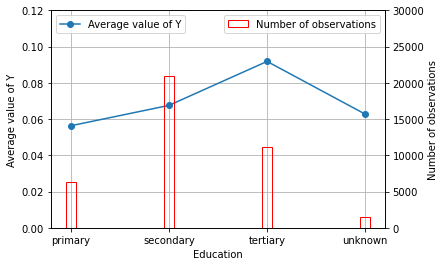

In [117]:
fig, ax = plt.subplots()

ax.plot(y_education['education'], y_education['y_average'], marker='o', label = 'Average value of Y')
ax.set_xlabel('Education')
ax.set_ylabel('Average value of Y')
#plt.xticks(rotation=90)
#ax.set_xlim([1, 4])
ax.set_ylim([0.0, 0.12])
ax.legend(loc="upper left")

ax2 = ax.twinx() 
ax2.bar(y_education['education'], y_education['y_count'], color = 'none', edgecolor = 'red', label = 'Number of observations', width=0.1)
ax2.set_ylabel('Number of observations') 
ax2.set_ylim([0, 30000])
ax2.legend(loc="upper right")

#ax.set_title('Number of observations and Average value of Y for each type of education')
ax.grid(True)
#plt.show()

<br><font color=blue>DEFAULT vs Y

In [118]:
y_default = df_merged.groupby(['default'])['y'].mean().reset_index()
y_default.rename(columns = {'y':'y_average'}, inplace = True)
y_default

,default,y_average
0,no,0.072644
1,yes,0.060569


In [119]:
df_default = df_merged.groupby(['default'])['y'].count().reset_index()
df_default.rename(columns = {'y':'y_count'}, inplace = True)
df_default

,default,y_count
0,no,39191
1,yes,809


In [120]:
df_default = df_default.drop(['default'], axis=1)
df_default

,y_count
0,39191
1,809


In [121]:
y_default = pd.concat([y_default, df_default], axis=1)
y_default

,default,y_average,y_count
0,no,0.072644,39191
1,yes,0.060569,809


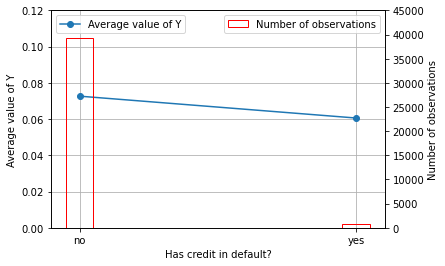

In [122]:
fig, ax = plt.subplots()

ax.plot(y_default['default'], y_default['y_average'], marker='o', label = 'Average value of Y')
ax.set_xlabel('Has credit in default?')
ax.set_ylabel('Average value of Y')
#plt.xticks(rotation=90)
#ax.set_xlim([1, 4])
ax.set_ylim([0.0, 0.12])
ax.legend(loc="upper left")

ax2 = ax.twinx() 
ax2.bar(y_default['default'], y_default['y_count'], color = 'none', edgecolor = 'red', label = 'Number of observations', width=0.1)
ax2.set_ylabel('Number of observations') 
ax2.set_ylim([0, 45000])
ax2.legend(loc="upper right")

#ax.set_title('Number of observations and Average value of Y for each type of default')
ax.grid(True)
#plt.show()

<br><font color=blue>BALANCE vs Y

In [123]:
y_bal = df_merged.groupby(['balance'])['y'].mean().reset_index()
y_bal.rename(columns = {'y':'y_average'}, inplace = True)
y_bal

,balance,y_average
0,1: -10000 - -1,0.054179
1,2: 0-2000,0.070593
2,3: 2001-5000,0.097849
3,4: 5001-10000,0.097372
4,5: 10001-30000,0.092399


In [124]:
df_bal = df_merged.groupby(['balance'])['y'].count().reset_index()
df_bal.rename(columns = {'y':'y_count'}, inplace = True)
df_bal

,balance,y_count
0,1: -10000 - -1,6940
1,2: 0-2000,26065
2,3: 2001-5000,4650
3,4: 5001-10000,1674
4,5: 10001-30000,671


In [125]:
df_bal = df_bal.drop(['balance'], axis=1)
df_bal

,y_count
0,6940
1,26065
2,4650
3,1674
4,671


In [126]:
y_bal = pd.concat([y_bal, df_bal], axis=1)
y_bal

,balance,y_average,y_count
0,1: -10000 - -1,0.054179,6940
1,2: 0-2000,0.070593,26065
2,3: 2001-5000,0.097849,4650
3,4: 5001-10000,0.097372,1674
4,5: 10001-30000,0.092399,671


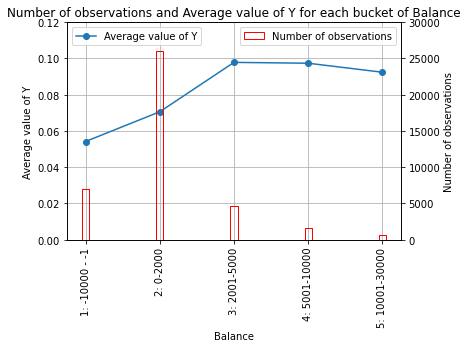

In [127]:
fig, ax = plt.subplots()

ax.plot(y_bal['balance'], y_bal['y_average'], marker='o', label = 'Average value of Y')
ax.set_xlabel('Balance')
ax.set_ylabel('Average value of Y')
plt.xticks(rotation=90)
#ax.set_xlim([1, 4])
ax.set_ylim([0.0, 0.12])
ax.legend(loc="upper left")

ax2 = ax.twinx() 
ax2.bar(y_bal['balance'], y_bal['y_count'], color = 'none', edgecolor = 'red', label = 'Number of observations', width=0.1)
ax2.set_ylabel('Number of observations') 
ax2.set_ylim([0, 30000])
ax2.legend(loc="upper right")

ax.set_title('Number of observations and Average value of Y for each bucket of Balance')
ax.grid(True)
#plt.show()

<br><font color=blue>HOUSING vs Y

In [128]:
y_housing = df_merged.groupby(['housing'])['y'].mean().reset_index()
y_housing.rename(columns = {'y':'y_average'}, inplace = True)
y_housing

,housing,y_average
0,no,0.089674
1,yes,0.060921


In [129]:
df_housing = df_merged.groupby(['housing'])['y'].count().reset_index()
df_housing.rename(columns = {'y':'y_count'}, inplace = True)
df_housing

,housing,y_count
0,no,15969
1,yes,24031


In [130]:
df_housing = df_housing.drop(['housing'], axis=1)
df_housing

,y_count
0,15969
1,24031


In [131]:
y_housing = pd.concat([y_housing, df_housing], axis=1)
y_housing

,housing,y_average,y_count
0,no,0.089674,15969
1,yes,0.060921,24031


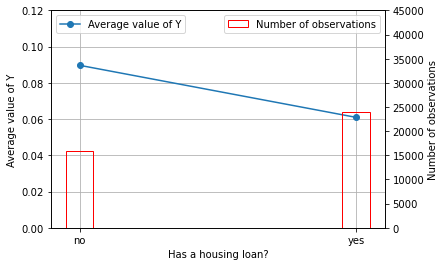

In [132]:
fig, ax = plt.subplots()

ax.plot(y_housing['housing'], y_housing['y_average'], marker='o', label = 'Average value of Y')
ax.set_xlabel('Has a housing loan?')
ax.set_ylabel('Average value of Y')
#plt.xticks(rotation=90)
#ax.set_xlim([1, 4])
ax.set_ylim([0.0, 0.12])
ax.legend(loc="upper left")

ax2 = ax.twinx() 
ax2.bar(y_housing['housing'], y_housing['y_count'], color = 'none', edgecolor = 'red', label = 'Number of observations', width=0.1)
ax2.set_ylabel('Number of observations') 
ax2.set_ylim([0, 45000])
ax2.legend(loc="upper right")

#ax.set_title('Number of observations and Average value of Y for each type of housing')
ax.grid(True)
#plt.show()

<br><font color=blue>LOAN vs Y

In [133]:
y_loan = df_merged.groupby(['loan'])['y'].mean().reset_index()
y_loan.rename(columns = {'y':'y_average'}, inplace = True)
y_loan

,loan,y_average
0,no,0.076081
1,yes,0.054834


In [134]:
df_loan = df_merged.groupby(['loan'])['y'].count().reset_index()
df_loan.rename(columns = {'y':'y_count'}, inplace = True)
df_loan

,loan,y_count
0,no,33070
1,yes,6930


In [135]:
df_loan = df_loan.drop(['loan'], axis=1)
df_loan

,y_count
0,33070
1,6930


In [136]:
y_loan = pd.concat([y_loan, df_loan], axis=1)
y_loan

,loan,y_average,y_count
0,no,0.076081,33070
1,yes,0.054834,6930


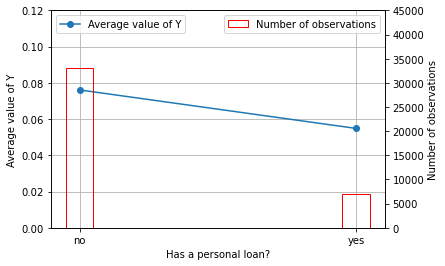

In [137]:
fig, ax = plt.subplots()

ax.plot(y_loan['loan'], y_loan['y_average'], marker='o', label = 'Average value of Y')
ax.set_xlabel('Has a personal loan?')
ax.set_ylabel('Average value of Y')
#plt.xticks(rotation=90)
#ax.set_xlim([1, 4])
ax.set_ylim([0.0, 0.12])
ax.legend(loc="upper left")

ax2 = ax.twinx() 
ax2.bar(y_loan['loan'], y_loan['y_count'], color = 'none', edgecolor = 'red', label = 'Number of observations', width=0.1)
ax2.set_ylabel('Number of observations') 
ax2.set_ylim([0, 45000])
ax2.legend(loc="upper right")

#ax.set_title('Number of observations and Average value of Y for each type of loan')
ax.grid(True)
#plt.show()

<br><font color=blue>CONTACT vs Y

In [138]:
y_contact = df_merged.groupby(['contact'])['y'].mean().reset_index()
y_contact.rename(columns = {'y':'y_average'}, inplace = True)
y_contact

,contact,y_average
0,cellular,0.089628
1,telephone,0.071521
2,unknown,0.038935


In [139]:
df_contact = df_merged.groupby(['contact'])['y'].count().reset_index()
df_contact.rename(columns = {'y':'y_count'}, inplace = True)
df_contact

,contact,y_count
0,cellular,24914
1,telephone,2321
2,unknown,12765


In [140]:
df_contact = df_contact.drop(['contact'], axis=1)
df_contact

,y_count
0,24914
1,2321
2,12765


In [141]:
y_contact = pd.concat([y_contact, df_contact], axis=1)
y_contact

,contact,y_average,y_count
0,cellular,0.089628,24914
1,telephone,0.071521,2321
2,unknown,0.038935,12765


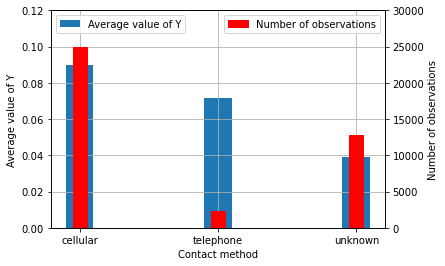

In [142]:
fig, ax = plt.subplots()

#ax.plot(y_contact['contact'], y_contact['y_average'], marker='o', label = 'Average value of Y')
ax.bar(y_contact['contact'], y_contact['y_average'], label = 'Average value of Y', width=0.2)
ax.set_xlabel('Contact method')
ax.set_ylabel('Average value of Y')
#plt.xticks(rotation=90)
#ax.set_xlim([1, 4])
ax.set_ylim([0.0, 0.12])
ax.legend(loc="upper left")

ax2 = ax.twinx() 
ax2.bar(y_contact['contact'], y_contact['y_count'], color = 'red', edgecolor = 'red', label = 'Number of observations', width=0.1)
ax2.set_ylabel('Number of observations') 
ax2.set_ylim([0, 30000])
ax2.legend(loc="upper right")

#ax.set_title('Number of observations and Average value of Y for each type of contact')
ax.grid(True)
#plt.show()

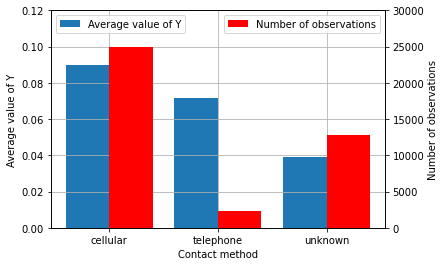

In [143]:
# To avoid overlapping of the bars in the above plot

fig, ax = plt.subplots()

#ax.bar(y_contact['contact'], y_contact['y_average'], label = 'Average value of Y', width=0.2)
_X = np.arange(len(y_contact['contact']))
ax.bar(_X - 0.2, y_contact['y_average'], width=0.4, label = 'Average value of Y')
ax.set_xlabel('Contact method')
ax.set_ylabel('Average value of Y')
#plt.xticks(rotation=90)
#ax.set_xlim([1, 4])
ax.set_ylim([0.0, 0.12])
ax.legend(loc="upper left")

ax2 = ax.twinx() 
#ax2.bar(y_contact['contact'], y_contact['y_count'], color = 'red', edgecolor = 'red', label = 'Number of observations', width=0.1)

ax2.bar(_X + 0.2, y_contact['y_count'], width=0.4, color='red', label = 'Number of observations')
plt.xticks(_X, y_contact['contact']) # set labels manually

ax2.set_ylabel('Number of observations') 
ax2.set_ylim([0, 30000])
ax2.legend(loc="upper right")

#ax.set_title('Number of observations and Average value of Y for each type of contact')
ax.grid(True)
#plt.show()

<br><font color=blue>DAY vs Y

In [144]:
y_day = df_merged.groupby(['day'])['y'].mean().reset_index()
y_day.rename(columns = {'y':'y_average'}, inplace = True)
#y_day

In [145]:
df_day = df_merged.groupby(['day'])['y'].count().reset_index()
df_day.rename(columns = {'y':'y_count'}, inplace = True)
#df_day

In [146]:
df_day = df_day.drop(['day'], axis=1)
#df_day

In [147]:
y_day = pd.concat([y_day, df_day], axis=1)
y_day

,day,y_average,y_count
0,1,0.227273,176
1,2,0.093778,1109
2,3,0.091533,874
3,4,0.098901,1183
4,5,0.066824,1691
5,6,0.061867,1778
6,7,0.049628,1612
7,8,0.062963,1620
8,9,0.052402,1374
9,10,0.123626,364


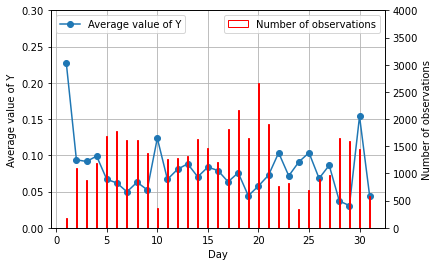

In [148]:
fig, ax = plt.subplots()

ax.plot(y_day['day'], y_day['y_average'], marker='o', label = 'Average value of Y')
ax.set_xlabel('Day')
ax.set_ylabel('Average value of Y')
#plt.xticks(rotation=90)
#ax.set_xlim([1, 4])
ax.set_ylim([0.0, 0.3])
ax.legend(loc="upper left")

ax2 = ax.twinx() 
ax2.bar(y_day['day'], y_day['y_count'], color = 'none', edgecolor = 'red', label = 'Number of observations', width=0.1)
ax2.set_ylabel('Number of observations') 
ax2.set_ylim([0, 4000])
ax2.legend(loc="upper right")

#ax.set_title('Number of observations and Average value of Y for each type of day')
ax.grid(True)
#plt.show()

<br><font color=blue>MONTH vs Y

In [149]:
y_month = df_merged.groupby(['month'])['y'].mean().reset_index()
y_month.rename(columns = {'y':'y_average'}, inplace = True)
y_month

,month,y_average
0,apr,0.165931
1,aug,0.055225
2,dec,0.076923
3,feb,0.111063
4,jan,0.032313
5,jul,0.060188
6,jun,0.062104
7,mar,0.484496
8,may,0.058454
9,nov,0.061145


In [150]:
df_month = df_merged.groupby(['month'])['y'].count().reset_index()
df_month.rename(columns = {'y':'y_count'}, inplace = True)
df_month

,month,y_count
0,apr,2718
1,aug,5215
2,dec,13
3,feb,2296
4,jan,1176
5,jul,6380
6,jun,4734
7,mar,258
8,may,13532
9,nov,3598


In [151]:
df_month = df_month.drop(['month'], axis=1)
df_month

,y_count
0,2718
1,5215
2,13
3,2296
4,1176
5,6380
6,4734
7,258
8,13532
9,3598


In [152]:
y_month = pd.concat([y_month, df_month], axis=1)
y_month

,month,y_average,y_count
0,apr,0.165931,2718
1,aug,0.055225,5215
2,dec,0.076923,13
3,feb,0.111063,2296
4,jan,0.032313,1176
5,jul,0.060188,6380
6,jun,0.062104,4734
7,mar,0.484496,258
8,may,0.058454,13532
9,nov,0.061145,3598


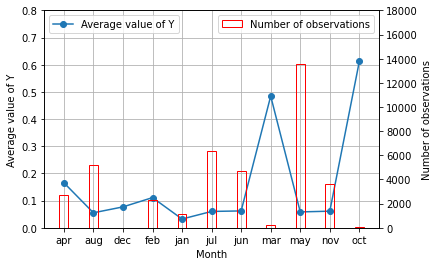

In [153]:
fig, ax = plt.subplots()

ax.plot(y_month['month'], y_month['y_average'], marker='o', label = 'Average value of Y')
ax.set_xlabel('Month')
ax.set_ylabel('Average value of Y')
#plt.xticks(rotation=90)
#ax.set_xlim([1, 4])
ax.set_ylim([0.0, 0.8])
ax.legend(loc="upper left")

ax2 = ax.twinx() 
ax2.bar(y_month['month'], y_month['y_count'], color = 'none', edgecolor = 'red', label = 'Number of observations', width=0.3)
ax2.set_ylabel('Number of observations') 
ax2.set_ylim([0, 18000])
ax2.legend(loc="upper right")

#ax.set_title('Number of observations and Average value of Y for each type of month')
ax.grid(True)
#plt.show()

<br><font color=blue>DURATION vs Y

In [154]:
y_duration = df_merged.groupby(['duration'])['y'].mean().reset_index()
y_duration.rename(columns = {'y':'y_average'}, inplace = True)
y_duration

,duration,y_average
0,0,0.000000
1,1,0.000886
2,2,0.011839
3,3,0.023335
4,4,0.031459
5,5,0.039789
6,6,0.052100
7,7,0.081828
8,8,0.118160
9,9,0.187828


In [155]:
df_duration = df_merged.groupby(['duration'])['y'].count().reset_index()
df_duration.rename(columns = {'y':'y_count'}, inplace = True)
df_duration

,duration,y_count
0,0,3
1,1,4517
2,2,8447
3,3,7628
4,4,5245
5,5,3594
6,6,2476
7,7,1772
8,8,1261
9,9,953


In [156]:
df_duration = df_duration.drop(['duration'], axis=1)
df_duration

,y_count
0,3
1,4517
2,8447
3,7628
4,5245
5,3594
6,2476
7,1772
8,1261
9,953


In [157]:
y_duration = pd.concat([y_duration, df_duration], axis=1)
y_duration

,duration,y_average,y_count
0,0,0.000000,3
1,1,0.000886,4517
2,2,0.011839,8447
3,3,0.023335,7628
4,4,0.031459,5245
5,5,0.039789,3594
6,6,0.052100,2476
7,7,0.081828,1772
8,8,0.118160,1261
9,9,0.187828,953


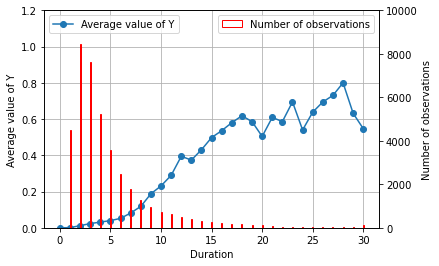

In [158]:
fig, ax = plt.subplots()

ax.plot(y_duration['duration'], y_duration['y_average'], marker='o', label = 'Average value of Y')
ax.set_xlabel('Duration')
ax.set_ylabel('Average value of Y')
#plt.xticks(rotation=90)
#ax.set_xlim([1, 4])
ax.set_ylim([0.0, 1.2])
ax.legend(loc="upper left")

ax2 = ax.twinx() 
ax2.bar(y_duration['duration'], y_duration['y_count'], color = 'none', edgecolor = 'red', label = 'Number of observations', width=0.1)
ax2.set_ylabel('Number of observations') 
ax2.set_ylim([0, 10000])
ax2.legend(loc="upper right")

#ax.set_title('Number of observations and Average value of Y for each type of duration')
ax.grid(True)
#plt.show()

<br><font color=blue>CAMPAIGN vs Y

In [159]:
y_campaign = df_merged.groupby(['campaign'])['y'].mean().reset_index()
y_campaign.rename(columns = {'y':'y_average'}, inplace = True)
y_campaign

,campaign,y_average
0,1: 0-1,0.085881
1,2: 1-2,0.068143
2,3: 2-3,0.070825
3,4:3-5,0.064183
4,5: 5-10,0.052423
5,6: 10-65,0.037068


In [160]:
df_campaign = df_merged.groupby(['campaign'])['y'].count().reset_index()
df_campaign.rename(columns = {'y':'y_count'}, inplace = True)
df_campaign

,campaign,y_count
0,1: 0-1,14718
1,2: 1-2,11153
2,3: 2-3,4970
3,4:3-5,4939
4,5: 5-10,3033
5,6: 10-65,1187


In [161]:
df_campaign = df_campaign.drop(['campaign'], axis=1)
df_campaign

,y_count
0,14718
1,11153
2,4970
3,4939
4,3033
5,1187


In [162]:
y_campaign = pd.concat([y_campaign, df_campaign], axis=1)
y_campaign

,campaign,y_average,y_count
0,1: 0-1,0.085881,14718
1,2: 1-2,0.068143,11153
2,3: 2-3,0.070825,4970
3,4:3-5,0.064183,4939
4,5: 5-10,0.052423,3033
5,6: 10-65,0.037068,1187


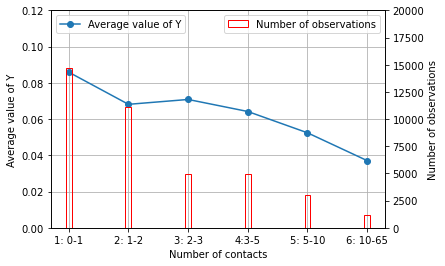

In [163]:
fig, ax = plt.subplots()

ax.plot(y_campaign['campaign'], y_campaign['y_average'], marker='o', label = 'Average value of Y')
ax.set_xlabel('Number of contacts')
ax.set_ylabel('Average value of Y')
#plt.xticks(rotation=90)
#ax.set_xlim([1, 4])
ax.set_ylim([0.0, 0.12])
ax.legend(loc="upper left")

ax2 = ax.twinx() 
ax2.bar(y_campaign['campaign'], y_campaign['y_count'], color = 'none', edgecolor = 'red', label = 'Number of observations', width=0.1)
ax2.set_ylabel('Number of observations') 
ax2.set_ylim([0, 20000])
ax2.legend(loc="upper right")

#ax.set_title('Number of observations and Average value of Y for each type of campaign')
ax.grid(True)
#plt.show()

### Dropping the variables that are less important or not important at all

In [164]:
list(df_X_OHE.columns)

['day',
 'duration',
 'age_1: 18-25',
 'age_2: 26-40',
 'age_3: 41-55',
 'age_4: 56-100',
 'job_blue-collar',
 'job_self-employed',
 'job_services',
 'job_unemployed',
 'job_unknown',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'balance_1: -10000 - -1',
 'balance_2: 0-2000',
 'balance_3: 2001-5000',
 'balance_4: 5001-10000',
 'balance_5: 10001-30000',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'campaign_1: 0-1',
 'campaign_2: 1-2',
 'campaign_3: 2-3',
 'campaign_4:3-5',
 'campaign_5: 5-10',
 'campaign_6: 10-65']

In [165]:
# Taking backup of the dataframe to experiment with dropping of different variables
df_X_OHE_backup = df_X_OHE

<br><font color=blue>Run the below cells for experimenting different combinations of variables

In [166]:
# Recovering original dataset for the next experiment
df_X_OHE = df_X_OHE_backup

In [167]:
df_X_OHE = df_X_OHE.drop(['day'], axis=1)
df_X_OHE.drop(columns = df_X_OHE.columns[df_X_OHE.columns.str.startswith('month')], inplace = True)
df_X_OHE.drop(columns = df_X_OHE.columns[df_X_OHE.columns.str.startswith('contact')], inplace = True)
df_X_OHE.drop(columns = df_X_OHE.columns[df_X_OHE.columns.str.startswith('default')], inplace = True)
df_X_OHE.drop(columns = df_X_OHE.columns[df_X_OHE.columns.str.startswith('job')], inplace = True)

df_X_OHE.drop(columns = df_X_OHE.columns[df_X_OHE.columns.str.startswith('marital')], inplace = True)
df_X_OHE.drop(columns = df_X_OHE.columns[df_X_OHE.columns.str.startswith('education')], inplace = True)
df_X_OHE.drop(columns = df_X_OHE.columns[df_X_OHE.columns.str.startswith('housing')], inplace = True)
df_X_OHE.drop(columns = df_X_OHE.columns[df_X_OHE.columns.str.startswith('loan')], inplace = True)
#df_X_OHE.drop(columns = df_X_OHE.columns[df_X_OHE.columns.str.startswith('age')], inplace = True)

In [168]:
list(df_X_OHE.columns)

['duration',
 'age_1: 18-25',
 'age_2: 26-40',
 'age_3: 41-55',
 'age_4: 56-100',
 'balance_1: -10000 - -1',
 'balance_2: 0-2000',
 'balance_3: 2001-5000',
 'balance_4: 5001-10000',
 'balance_5: 10001-30000',
 'campaign_1: 0-1',
 'campaign_2: 1-2',
 'campaign_3: 2-3',
 'campaign_4:3-5',
 'campaign_5: 5-10',
 'campaign_6: 10-65']

## Prediction Model

<font color=blue>Splitting the data into __Train__ and __Test__ data sets

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X_OHE, df_y, test_size = 0.2, random_state = 42)

In [170]:
print('Size of X_train: ', X_train.shape)
print('Size of X_test: ', X_test.shape)
print('Size of y_train: ', y_train.shape)
print('Size of y_test: ', y_test.shape)

Size of X_train:  (32000, 16)
Size of X_test:  (8000, 16)
Size of y_train:  (32000,)
Size of y_test:  (8000,)


_1. XGBoost_

In [171]:
import xgboost as xgb
from xgboost import XGBClassifier

In [172]:
#X_train = X_train.drop(['age', 'balance', 'campaign'], axis=1)   # dropping the category variables for testing
print(X_train.shape)
#X_train

(32000, 16)


In [173]:
#X_test = X_test.drop(['age', 'balance', 'campaign'], axis=1)   # dropping the category variables for testing
print(X_test.shape)
X_test

(8000, 16)


,duration,age_1: 18-25,age_2: 26-40,age_3: 41-55,age_4: 56-100,balance_1: -10000 - -1,balance_2: 0-2000,balance_3: 2001-5000,balance_4: 5001-10000,balance_5: 10001-30000,campaign_1: 0-1,campaign_2: 1-2,campaign_3: 2-3,campaign_4:3-5,campaign_5: 5-10,campaign_6: 10-65
32823,4,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
16298,6,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
28505,7,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
6689,3,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
26893,3,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13618,7,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
35165,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
16359,12,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3842,6,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [174]:
# fit model to training data
#model = XGBClassifier(n_estimators=5000, learning_rate=0.5)
model = XGBClassifier(n_estimators=5000, learning_rate=0.1)

#model = XGBClassifier(n_estimators=5000, learning_rate=0.1, enable_categorical=True)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [175]:
print(model)   # to see the parameters used in the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [176]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(y_pred)
print(predictions)

[0 0 0 ... 0 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [177]:
# evaluate predictions
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.24%


### Variable Importance

Get feature importance using XGBoost

In [178]:
# get importance
importance = model.feature_importances_

In [179]:
importance_df = pd.DataFrame(importance*100, columns=['Importance %'])
X_train_columns = pd.DataFrame(X_train.columns, columns=['Feature'])
importance_df = X_train_columns.join(importance_df)
importance_df.sort_values('Importance %', ascending = False)

,Feature,Importance %
0,duration,23.785149
4,age_4: 56-100,19.907215
7,balance_3: 2001-5000,5.865571
10,campaign_1: 0-1,5.777652
1,age_1: 18-25,5.652452
5,balance_1: -10000 - -1,5.402617
6,balance_2: 0-2000,4.912926
2,age_2: 26-40,4.542363
8,balance_4: 5001-10000,4.043973
12,campaign_3: 2-3,3.725603


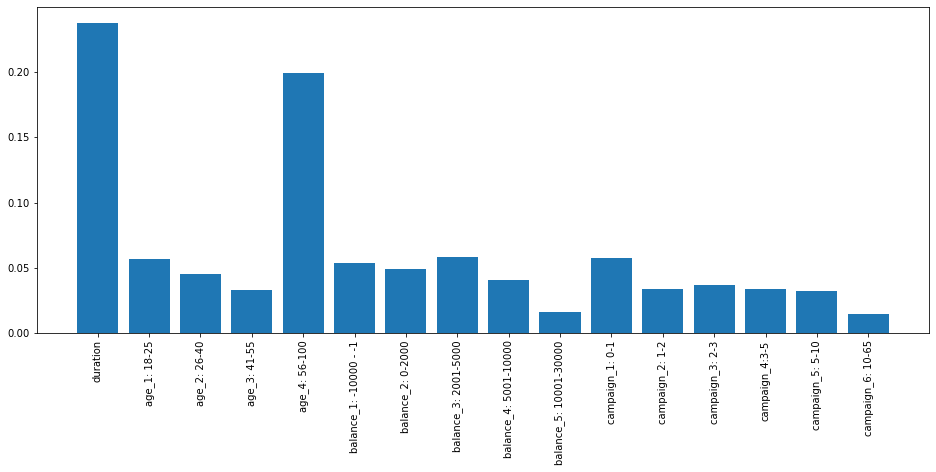

In [180]:
# plot feature importance

plt.figure(figsize=(16, 6))

#plt.bar(range(len(importance)), importance)
plt.bar(X_train.columns, importance)
plt.xticks(rotation=90)
plt.show()

### Confusion Matrix

In [181]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

In [182]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

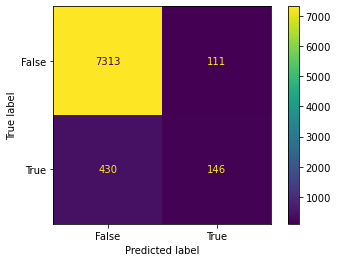

In [183]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

### Classification Report

In [184]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7424
           1       0.57      0.25      0.35       576

    accuracy                           0.93      8000
   macro avg       0.76      0.62      0.66      8000
weighted avg       0.92      0.93      0.92      8000



### Predicted vs Observed

In [185]:
predicted = pd.DataFrame(predictions, columns=['Y'])   # Changing the predicted list into a dataframe
predicted.value_counts()

Y
0    7743
1     257
dtype: int64

In [186]:
predicted

,Y
0,0
1,0
2,0
3,0
4,0
...,...
7995,0
7996,0
7997,0
7998,0


In [187]:
y_test

32823    0
16298    0
28505    0
6689     0
26893    0
        ..
13618    0
35165    0
16359    0
3842     0
37682    0
Name: y, Length: 8000, dtype: int64

In [188]:
y_test.columns = ['y']
y_test

32823    0
16298    0
28505    0
6689     0
26893    0
        ..
13618    0
35165    0
16359    0
3842     0
37682    0
Name: y, Length: 8000, dtype: int64

In [189]:
y_test.value_counts()

0    7424
1     576
Name: y, dtype: int64

<br><font color=blue>DURATION vs Y

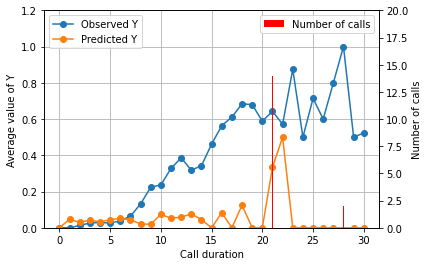

In [190]:
fig,ax = plt.subplots()

ax.plot(y_test.groupby(X_test['duration']).mean(), marker='o', label = 'Observed Y')
ax.plot(predicted.groupby(X_test['duration']).mean(), marker='o', label = 'Predicted Y')
ax.set_xlabel('Call duration')
ax.set_ylabel('Average value of Y')
#ax.set_xlim([0.5, 5.5])
ax.set_ylim([0.0, 1.2])
ax.legend(loc="upper left")

ax2 = ax.twinx() 
ax2.hist(X_test['duration'], X_test['duration'].count(), color = 'red', label = 'Number of calls')
ax2.set_ylabel('Number of calls') 
ax2.set_ylim([0, 20])
ax2.legend(loc="upper right")

#ax.set_title('Observed vs Predicted Y for different values of AAA')
ax.grid(True)
plt.show()

In [191]:
#----- Break -----

## Hyperparameter tuning to improve the model's performance to predict positives correctly ('recall' value for '1s')

In [192]:
# First check the class imbalance between 0s and 1s in the dataset
print('Unique values of ''y'':', df_y.unique())
print('\nNumber of occurences of each unique value of ''y'':\n', df_y.value_counts())

Unique values of y: [0 1]

Number of occurences of each unique value of y:
 0    37104
1     2896
Name: y, dtype: int64


The ratio between 0 and 1 is around 12.8, so we can set the scale_pos_weight value in the XGBoost model to 13.

In [193]:
# Also check the class imbalance between 0s and 1s in the TRAINING dataset
print('Unique values of ''y'':', y_train.unique())
print('\nNumber of occurences of each unique value of ''y'':\n', y_train.value_counts())

Unique values of y: [0 1]

Number of occurences of each unique value of y:
 0    29680
1     2320
Name: y, dtype: int64


The ratio in the training dataset is also same i.e., 12.79. 

In [194]:
# define model with class-weighted XGBoost for imbalanced classification
model = XGBClassifier(scale_pos_weight=10, n_estimators=5000, learning_rate=0.1)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [195]:
print(model)   # to see the parameters used in the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [196]:
# make predictions for test data
y_pred_weighted = model.predict(X_test)
predictions_weighted = [round(value) for value in y_pred_weighted]
#print(y_pred_weighted)
#print(predictions_weighted)
df_predictions_weighted = pd.DataFrame(predictions_weighted, columns = ['y_pred'])
df_predictions_weighted

,y_pred
0,0
1,0
2,0
3,0
4,0
...,...
7995,1
7996,0
7997,1
7998,0


In [197]:
# evaluate predictions
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, df_predictions_weighted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.10%


### Confusion Matrix

In [198]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predictions_weighted)

In [199]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

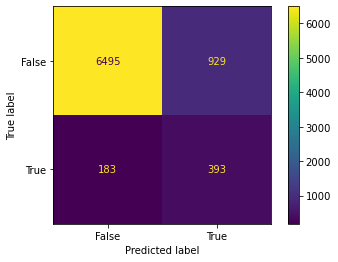

In [200]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

### Classification Report

In [201]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_weighted))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7424
           1       0.30      0.68      0.41       576

    accuracy                           0.86      8000
   macro avg       0.63      0.78      0.67      8000
weighted avg       0.92      0.86      0.88      8000



Prediction accuracy for the positive class has increased significantly by using the class-weighted XGBoost model. 

### Predicted vs Observed after model optimization by weigted sampling

In [202]:
# Merging the 'X' variables with Observed and Pedicted 'y' for plotting the graphs

df_comp = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True), df_predictions_weighted], axis=1)
df_comp

,duration,age_1: 18-25,age_2: 26-40,age_3: 41-55,age_4: 56-100,balance_1: -10000 - -1,balance_2: 0-2000,balance_3: 2001-5000,balance_4: 5001-10000,balance_5: 10001-30000,campaign_1: 0-1,campaign_2: 1-2,campaign_3: 2-3,campaign_4:3-5,campaign_5: 5-10,campaign_6: 10-65,y,y_pred
0,4,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,6,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,7,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,3,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,3,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
7996,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
7997,12,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
7998,6,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


<br><font color=blue>"All AGE buckets" vs "Y"

In [203]:
df_comp_age = df_comp.drop(['duration'], axis=1)
df_comp_age.drop(columns = df_comp_age.columns[df_comp_age.columns.str.startswith('balance')], inplace = True)
df_comp_age.drop(columns = df_comp_age.columns[df_comp_age.columns.str.startswith('campaign')], inplace = True)
df_comp_age

,age_1: 18-25,age_2: 26-40,age_3: 41-55,age_4: 56-100,y,y_pred
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
7995,0,0,1,0,0,1
7996,0,1,0,0,0,0
7997,0,1,0,0,0,1
7998,0,0,1,0,0,0


In [204]:
df_comp_age = df_comp_age.melt(id_vars=["y", "y_pred"], var_name="age", value_name="value")
df_comp_age

,y,y_pred,age,value
0,0,0,age_1: 18-25,0
1,0,0,age_1: 18-25,0
2,0,0,age_1: 18-25,0
3,0,0,age_1: 18-25,0
4,0,0,age_1: 18-25,0
...,...,...,...,...
31995,0,1,age_4: 56-100,0
31996,0,0,age_4: 56-100,0
31997,0,1,age_4: 56-100,0
31998,0,0,age_4: 56-100,0


In [205]:
y_age_obs = df_comp_age.query("value == 1").groupby(['age'])['y'].mean().reset_index()
y_age_obs.rename(columns = {'y':'y_obs'}, inplace = True)
y_age_obs

,age,y_obs
0,age_1: 18-25,0.093645
1,age_2: 26-40,0.072016
2,age_3: 41-55,0.055718
3,age_4: 56-100,0.372093


In [206]:
y_age_pred = df_comp_age.query("value == 1").groupby(['age'])['y_pred'].mean().reset_index()
y_age_pred

,age,y_pred
0,age_1: 18-25,0.270067
1,age_2: 26-40,0.141747
2,age_3: 41-55,0.148722
3,age_4: 56-100,0.558140


In [207]:
y_age_pred = y_age_pred.drop(['age'], axis=1)
y_age_pred

,y_pred
0,0.270067
1,0.141747
2,0.148722
3,0.558140


In [208]:
y_age = pd.concat([y_age_obs, y_age_pred], axis=1)
y_age

,age,y_obs,y_pred
0,age_1: 18-25,0.093645,0.270067
1,age_2: 26-40,0.072016,0.141747
2,age_3: 41-55,0.055718,0.148722
3,age_4: 56-100,0.372093,0.558140


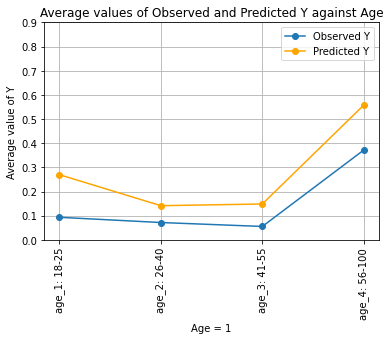

In [209]:
plt.plot(y_age['age'], y_age['y_obs'], marker='o', label = 'Observed Y')
plt.plot(y_age['age'], y_age['y_pred'], marker='o', color = 'orange', label = 'Predicted Y')
plt.xlabel('Age = 1')
plt.ylabel('Average value of Y')
plt.xticks(rotation=90)
#plt.xlim([1, 4])
plt.ylim([0.0, 0.9])
plt.legend(loc="upper right")

plt.title('Average values of Observed and Predicted Y against Age')
plt.grid(True)
plt.show()

<br><font color=blue>"All BALANCE buckets" vs "Y"

In [210]:
df_comp_balance = df_comp.drop(['duration'], axis=1)
df_comp_balance.drop(columns = df_comp_balance.columns[df_comp_balance.columns.str.startswith('campaign')], inplace = True)
df_comp_balance.drop(columns = df_comp_balance.columns[df_comp_balance.columns.str.startswith('age')], inplace = True)
df_comp_balance

,balance_1: -10000 - -1,balance_2: 0-2000,balance_3: 2001-5000,balance_4: 5001-10000,balance_5: 10001-30000,y,y_pred
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
7995,0,1,0,0,0,0,1
7996,0,1,0,0,0,0,0
7997,0,1,0,0,0,0,1
7998,0,1,0,0,0,0,0


In [211]:
df_comp_balance = df_comp_balance.melt(id_vars=["y", "y_pred"], var_name="balance", value_name="value")
df_comp_balance

,y,y_pred,balance,value
0,0,0,balance_1: -10000 - -1,0
1,0,0,balance_1: -10000 - -1,0
2,0,0,balance_1: -10000 - -1,0
3,0,0,balance_1: -10000 - -1,0
4,0,0,balance_1: -10000 - -1,0
...,...,...,...,...
39995,0,1,balance_5: 10001-30000,0
39996,0,0,balance_5: 10001-30000,0
39997,0,1,balance_5: 10001-30000,0
39998,0,0,balance_5: 10001-30000,0


In [212]:
y_balance_obs = df_comp_balance.query("value == 1").groupby(['balance'])['y'].mean().reset_index()
y_balance_obs.rename(columns = {'y':'y_obs'}, inplace = True)
y_balance_obs

,balance,y_obs
0,balance_1: -10000 - -1,0.051883
1,balance_2: 0-2000,0.070320
2,balance_3: 2001-5000,0.099147
3,balance_4: 5001-10000,0.091503
4,balance_5: 10001-30000,0.115385


In [213]:
y_balance_pred = df_comp_balance.query("value == 1").groupby(['balance'])['y_pred'].mean().reset_index()
y_balance_pred

,balance,y_pred
0,balance_1: -10000 - -1,0.111585
1,balance_2: 0-2000,0.166315
2,balance_3: 2001-5000,0.212154
3,balance_4: 5001-10000,0.248366
4,balance_5: 10001-30000,0.169231


In [214]:
y_balance_pred = y_balance_pred.drop(['balance'], axis=1)
y_balance_pred

,y_pred
0,0.111585
1,0.166315
2,0.212154
3,0.248366
4,0.169231


In [215]:
y_balance = pd.concat([y_balance_obs, y_balance_pred], axis=1)
y_balance

,balance,y_obs,y_pred
0,balance_1: -10000 - -1,0.051883,0.111585
1,balance_2: 0-2000,0.070320,0.166315
2,balance_3: 2001-5000,0.099147,0.212154
3,balance_4: 5001-10000,0.091503,0.248366
4,balance_5: 10001-30000,0.115385,0.169231


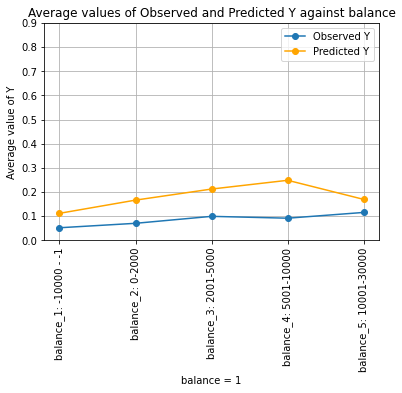

In [216]:
plt.plot(y_balance['balance'], y_balance['y_obs'], marker='o', label = 'Observed Y')
plt.plot(y_balance['balance'], y_balance['y_pred'], marker='o', color = 'orange', label = 'Predicted Y')
plt.xlabel('balance = 1')
plt.ylabel('Average value of Y')
plt.xticks(rotation=90)
#plt.xlim([1, 4])
plt.ylim([0.0, 0.9])
plt.legend(loc="upper right")

plt.title('Average values of Observed and Predicted Y against balance')
plt.grid(True)
plt.show()

<br><font color=blue>"All CAMPAIGN buckets" vs "Y"

In [217]:
df_comp_campaign = df_comp.drop(['duration'], axis=1)
df_comp_campaign.drop(columns = df_comp_campaign.columns[df_comp_campaign.columns.str.startswith('balance')], inplace = True)
df_comp_campaign.drop(columns = df_comp_campaign.columns[df_comp_campaign.columns.str.startswith('age')], inplace = True)
df_comp_campaign

,campaign_1: 0-1,campaign_2: 1-2,campaign_3: 2-3,campaign_4:3-5,campaign_5: 5-10,campaign_6: 10-65,y,y_pred
0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
7995,1,0,0,0,0,0,0,1
7996,1,0,0,0,0,0,0,0
7997,0,0,0,0,1,0,0,1
7998,0,0,0,1,0,0,0,0


In [218]:
df_comp_campaign = df_comp_campaign.melt(id_vars=["y", "y_pred"], var_name="campaign", value_name="value")
df_comp_campaign

,y,y_pred,campaign,value
0,0,0,campaign_1: 0-1,0
1,0,0,campaign_1: 0-1,1
2,0,0,campaign_1: 0-1,0
3,0,0,campaign_1: 0-1,1
4,0,0,campaign_1: 0-1,0
...,...,...,...,...
47995,0,1,campaign_6: 10-65,0
47996,0,0,campaign_6: 10-65,0
47997,0,1,campaign_6: 10-65,0
47998,0,0,campaign_6: 10-65,0


In [219]:
y_campaign_obs = df_comp_campaign.query("value == 1").groupby(['campaign'])['y'].mean().reset_index()
y_campaign_obs.rename(columns = {'y':'y_obs'}, inplace = True)
y_campaign_obs

,campaign,y_obs
0,campaign_1: 0-1,0.088767
1,campaign_2: 1-2,0.072628
2,campaign_3: 2-3,0.067278
3,campaign_4:3-5,0.047115
4,campaign_5: 5-10,0.051780
5,campaign_6: 10-65,0.039301


In [220]:
y_campaign_pred = df_comp_campaign.query("value == 1").groupby(['campaign'])['y_pred'].mean().reset_index()
y_campaign_pred

,campaign,y_pred
0,campaign_1: 0-1,0.208945
1,campaign_2: 1-2,0.158420
2,campaign_3: 2-3,0.160041
3,campaign_4:3-5,0.115385
4,campaign_5: 5-10,0.114887
5,campaign_6: 10-65,0.056769


In [221]:
y_campaign_pred = y_campaign_pred.drop(['campaign'], axis=1)
y_campaign_pred

,y_pred
0,0.208945
1,0.158420
2,0.160041
3,0.115385
4,0.114887
5,0.056769


In [222]:
y_campaign = pd.concat([y_campaign_obs, y_campaign_pred], axis=1)
y_campaign

,campaign,y_obs,y_pred
0,campaign_1: 0-1,0.088767,0.208945
1,campaign_2: 1-2,0.072628,0.158420
2,campaign_3: 2-3,0.067278,0.160041
3,campaign_4:3-5,0.047115,0.115385
4,campaign_5: 5-10,0.051780,0.114887
5,campaign_6: 10-65,0.039301,0.056769


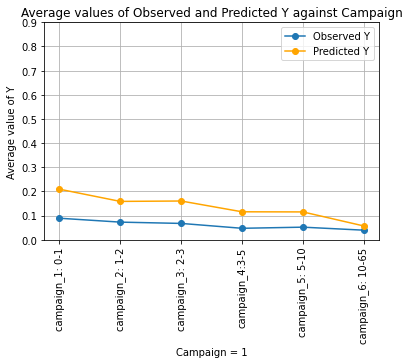

In [223]:
plt.plot(y_campaign['campaign'], y_campaign['y_obs'], marker='o', label = 'Observed Y')
plt.plot(y_campaign['campaign'], y_campaign['y_pred'], marker='o', color = 'orange', label = 'Predicted Y')
plt.xlabel('Campaign = 1')
plt.ylabel('Average value of Y')
plt.xticks(rotation=90)
#plt.xlim([1, 4])
plt.ylim([0.0, 0.9])
plt.legend(loc="upper right")

plt.title('Average values of Observed and Predicted Y against Campaign')
plt.grid(True)
plt.show()

<br><font color=blue>DURATION vs Y

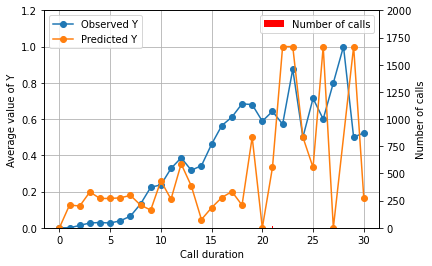

In [224]:
fig,ax = plt.subplots()

ax.plot(y_test.groupby(X_test['duration']).mean(), marker='o', label = 'Observed Y')
ax.plot(df_predictions_weighted.groupby(X_test['duration']).mean(), marker='o', label = 'Predicted Y')
ax.set_xlabel('Call duration')
ax.set_ylabel('Average value of Y')
#ax.set_xlim([0.5, 5.5])
ax.set_ylim([0.0, 1.2])
ax.legend(loc="upper left")

ax2 = ax.twinx() 
ax2.hist(X_test['duration'], X_test['duration'].count(), color = 'red', label = 'Number of calls')
ax2.set_ylabel('Number of calls') 
ax2.set_ylim([0, 2000])
ax2.legend(loc="upper right")

#ax.set_title('Observed vs Predicted Y for different values of AAA')
ax.grid(True)
plt.show()

In [225]:
#X_test['duration'].value_counts()

----- END -----